# Deep Learning Term Project for ECG (DIL700)

## Imports

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
import os
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from general_functions import *
import pickle
import json
from keras.models import model_from_json


from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings('ignore')

## Loading Dataset

Collect all the data from the csv files

In [3]:
train_df=combine_csv_files_to_df('./Dataset_mitbih/Training/')
test_df=combine_csv_files_to_df('./Dataset_mitbih/Testing/')
full_df_mitbih=pd.concat([train_df,test_df],ignore_index=True)

In [4]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [5]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [6]:
print(train_df[187].unique())

[0. 1. 2. 3. 4.]


In [7]:
labels = ['Normal', 'Artial Premature', 'Premature ventricular contraction', 'Fusion of ventricular and normal', 'Paced']

In [8]:
print('Number of samples in data:')
print(labels[0],':', len(train_df[train_df[187]==0]))
print(labels[1],':', len(train_df[train_df[187]==1]))
print(labels[2],':', len(train_df[train_df[187]==2]))
print(labels[3],':', len(train_df[train_df[187]==3]))
print(labels[4],':', len(train_df[train_df[187]==4]))

Number of samples in data:
Normal : 72471
Artial Premature : 2223
Premature ventricular contraction : 5788
Fusion of ventricular and normal : 641
Paced : 6431


In [9]:
print('Number of samples in data:')
print(labels[0],':', len(test_df[test_df[187]==0]))
print(labels[1],':', len(test_df[test_df[187]==1]))
print(labels[2],':', len(test_df[test_df[187]==2]))
print(labels[3],':', len(test_df[test_df[187]==3]))
print(labels[4],':', len(test_df[test_df[187]==4]))

Number of samples in data:
Normal : 18118
Artial Premature : 556
Premature ventricular contraction : 1448
Fusion of ventricular and normal : 162
Paced : 1608


## Bagging/Bootstrapping (sampling with replacement)

In [10]:
# from sklearn.utils import resample
# df_1=train_df[train_df[187]==1]
# df_2=train_df[train_df[187]==2]
# df_3=train_df[train_df[187]==3]
# df_4=train_df[train_df[187]==4]
# df_0=(train_df[train_df[187]==0]).sample(n=2000,random_state=42)

# df_1_upsample=resample(df_1,replace=True,n_samples=2000,random_state=123)
# df_2_upsample=resample(df_2,replace=True,n_samples=2000,random_state=124)
# df_3_upsample=resample(df_3,replace=True,n_samples=2000,random_state=125)
# df_4_upsample=resample(df_4,replace=True,n_samples=2000,random_state=126)

# train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

## Create feautures and labels for dataset

Create different dataframes for training/testing data and labels.
Also OneHotEncoding for the labels and renaming the classes

In [11]:
train_X = train_df.iloc[:, :-1]
train_y = train_df.iloc[:, -1]

train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size=0.2, random_state=82)

train_y_nn = pd.get_dummies(train_y, columns=[1])
train_y_nn = train_y_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "F", 4: "Q"})

valid_y_nn = pd.get_dummies(valid_y, columns=[1])
valid_y_nn = valid_y_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "F", 4: "Q"})

test_X = test_df.iloc[:, :-1]
test_y = test_df.iloc[:, -1]
test_y_nn = pd.get_dummies(test_y, columns=[1])
test_y_nn = test_y_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "F", 4: "Q"})

In [12]:
train_X

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
64726,1.000000,0.796117,0.337379,0.101942,0.118932,0.118932,0.070388,0.063107,0.070388,0.067961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22763,0.987433,0.903052,0.495512,0.143627,0.161580,0.202873,0.177738,0.175943,0.177738,0.168761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73919,1.000000,0.883721,0.213953,0.000000,0.079070,0.134884,0.106977,0.148837,0.227907,0.186047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51329,0.971717,0.709091,0.117172,0.008081,0.109091,0.086869,0.092929,0.072727,0.074747,0.062626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65634,1.000000,0.755747,0.528736,0.336207,0.181034,0.086207,0.040230,0.017241,0.014368,0.011494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38510,0.975357,0.941634,0.498054,0.000000,0.068742,0.125811,0.057069,0.050584,0.044099,0.040208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19805,0.990672,0.777985,0.139925,0.037313,0.098881,0.102612,0.115672,0.111940,0.110075,0.123134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41091,1.000000,0.905405,0.705405,0.354054,0.170270,0.124324,0.102703,0.059459,0.062162,0.037838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4546,1.000000,0.510791,0.000000,0.089928,0.089928,0.118705,0.111511,0.115108,0.097122,0.107914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
train_y

64726    0.0
22763    0.0
73919    1.0
51329    0.0
65634    0.0
        ... 
38510    0.0
19805    0.0
41091    0.0
4546     0.0
77955    2.0
Name: 187, Length: 70043, dtype: float64

In [14]:
train_y_nn

,N,S,V,F,Q
64726,1,0,0,0,0
22763,1,0,0,0,0
73919,0,1,0,0,0
51329,1,0,0,0,0
65634,1,0,0,0,0
...,...,...,...,...,...
38510,1,0,0,0,0
19805,1,0,0,0,0
41091,1,0,0,0,0
4546,1,0,0,0,0


In [15]:
valid_X

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
30886,0.865258,0.655218,0.260238,0.030383,0.000000,0.079260,0.126816,0.120211,0.107001,0.105680,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
72653,0.931579,0.836842,0.121053,0.028947,0.197368,0.218421,0.171053,0.189474,0.205263,0.197368,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37071,0.917241,0.562069,0.106897,0.117241,0.151724,0.120690,0.096552,0.089655,0.079310,0.075862,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
42520,1.000000,0.862797,0.546174,0.081794,0.092348,0.197889,0.327177,0.343008,0.374670,0.369393,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
72974,1.000000,0.940711,0.288538,0.000000,0.047431,0.122530,0.102767,0.122530,0.225296,0.237154,...,0.371542,0.363636,0.359684,0.367589,0.367589,0.359684,0.363636,0.351779,0.379447,0.375494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58341,1.000000,0.935412,0.492205,0.144766,0.216036,0.202673,0.200445,0.189310,0.182628,0.171492,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
54057,0.896382,0.722039,0.440789,0.203947,0.024671,0.000000,0.032895,0.055921,0.069079,0.062500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18964,0.971875,0.925000,0.634375,0.362500,0.075000,0.065625,0.109375,0.103125,0.187500,0.212500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
26375,0.974227,0.819588,0.628866,0.422680,0.237113,0.128866,0.108247,0.154639,0.149485,0.139175,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
valid_y

30886    0.0
72653    1.0
37071    0.0
42520    0.0
72974    1.0
        ... 
58341    0.0
54057    0.0
18964    0.0
26375    0.0
74760    2.0
Name: 187, Length: 17511, dtype: float64

In [17]:
valid_y_nn

,N,S,V,F,Q
30886,1,0,0,0,0
72653,0,1,0,0,0
37071,1,0,0,0,0
42520,1,0,0,0,0
72974,0,1,0,0,0
...,...,...,...,...,...
58341,1,0,0,0,0
54057,1,0,0,0,0
18964,1,0,0,0,0
26375,1,0,0,0,0


In [18]:
test_X

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
test_y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21887    4.0
21888    4.0
21889    4.0
21890    4.0
21891    4.0
Name: 187, Length: 21892, dtype: float64

In [20]:
test_y_nn

,N,S,V,F,Q
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
21887,0,0,0,0,1
21888,0,0,0,0,1
21889,0,0,0,0,1
21890,0,0,0,0,1


## Dataset Distribution

### Training set

In [21]:
train_df[187]=train_df[187].astype(int)
equilibre_train=train_df[187].value_counts(sort=False)
print(equilibre_train)

0    72471
1     2223
2     5788
3      641
4     6431
Name: 187, dtype: int64


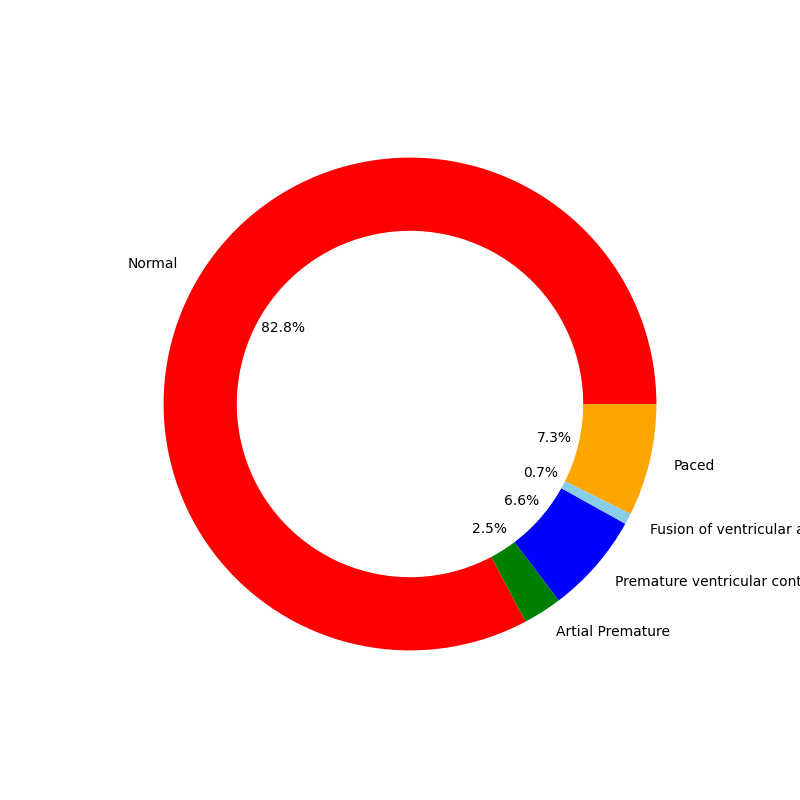

In [22]:
plt.figure(figsize=(8,8))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre_train, labels= labels
        , colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Validation set

In [23]:
valid_y=valid_y.astype(int)
equilibre_valid=valid_y.value_counts(sort=False)
print(equilibre_valid)

0    14475
1      451
2     1153
3      135
4     1297
Name: 187, dtype: int64


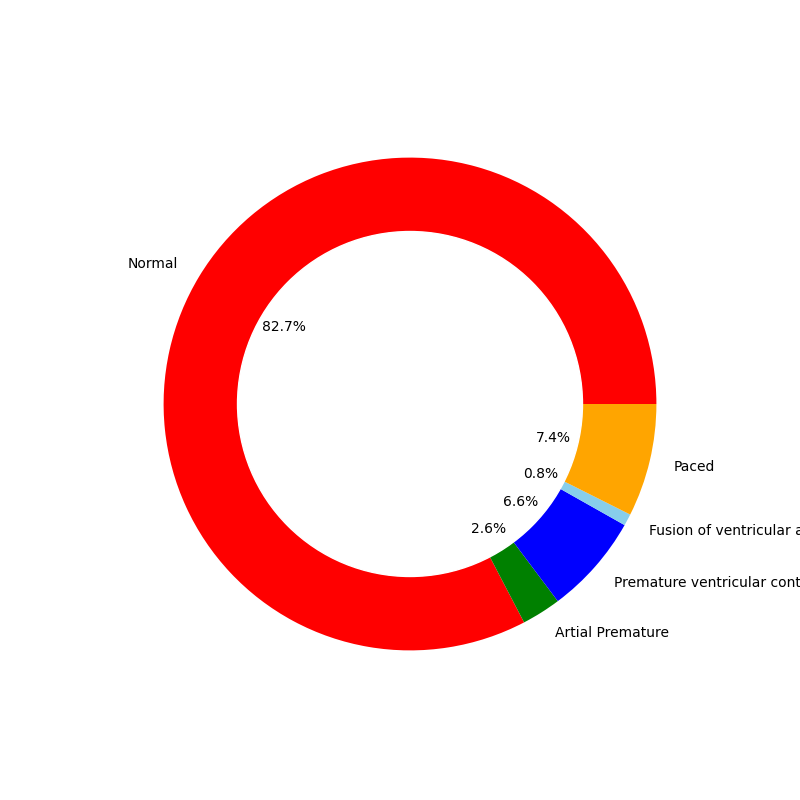

In [24]:
plt.figure(figsize=(8,8))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre_valid, labels= labels
        , colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Testing set

In [25]:
test_df[187]=test_df[187].astype(int)
equilibre_test=test_df[187].value_counts(sort=False)
print(equilibre_test)

0    18118
1      556
2     1448
3      162
4     1608
Name: 187, dtype: int64


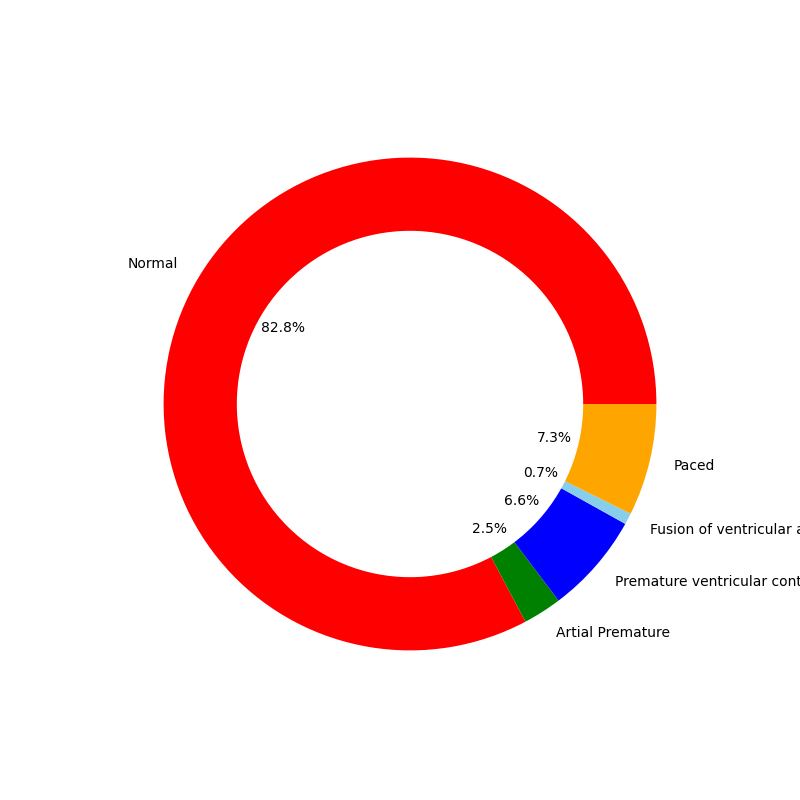

In [26]:
plt.figure(figsize=(8,8))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre_test, labels= labels
        , colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## CNN

In [27]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

im_shape=(train_X.shape[1],1)
inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
conv1_1=BatchNormalization()(conv1_1)
pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
conv2_1=BatchNormalization()(conv2_1)
pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
conv3_1=BatchNormalization()(conv3_1)
pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
flatten=Flatten()(pool3)
dense_end1 = Dense(64, activation='relu')(flatten)
dense_end2 = Dense(32, activation='relu')(dense_end1)
main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)


model = Model(inputs= inputs_cnn, outputs=main_output)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])


callbacks = [EarlyStopping(monitor='val_loss', patience=8),
            ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

history=model.fit(train_X, train_y_nn, epochs=40,callbacks=callbacks, batch_size=32,validation_data=(valid_X,valid_y_nn))
model.load_weights('best_model.h5')



Epoch 1/40
2189/2189 [==============================] - 21s 8ms/step - loss: 0.1350 - accuracy: 0.9625 - val_loss: 0.0943 - val_accuracy: 0.9749
Epoch 2/40
1218/2189 [===============>..............] - ETA: 6s - loss: 0.0792 - accuracy: 0.9777

KeyboardInterrupt: 

In [ ]:
scores = model.evaluate(test_X, test_y_nn, verbose=0)
print("Accuracy: %.5f%%" % (scores[1]*100))


Accuracy: 98.11347%


685/685 [==============================] - 1s 1ms/step


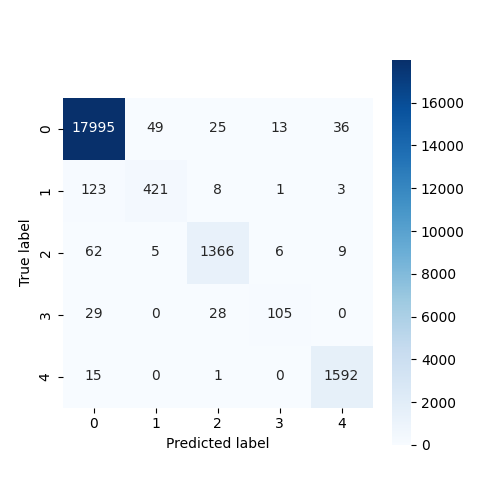

In [ ]:
# Predict test set labels
y_pred = model.predict(test_X)
y_pred_cnn = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(test_y, y_pred_cnn)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
print(classification_report(test_df[187], y_pred_cnn, target_names=labels))

                                   precision    recall  f1-score   support

                           Normal       0.99      0.99      0.99     18118
                 Artial Premature       0.89      0.76      0.82       556
Premature ventricular contraction       0.96      0.94      0.95      1448
 Fusion of ventricular and normal       0.84      0.65      0.73       162
                            Paced       0.97      0.99      0.98      1608

                         accuracy                           0.98     21892
                        macro avg       0.93      0.87      0.89     21892
                     weighted avg       0.98      0.98      0.98     21892



## Test MIT-BIH model on PTB dataset

In [30]:
normal_df_ptb = pd.read_csv('./Dataset_ptbdb/ptbdb_normal.csv',header=None)
abnormal_df_ptb = pd.read_csv('./Dataset_ptbdb/ptbdb_abnormal.csv',header=None)
# Combine to a full dataset
full_df_ptb = pd.concat([normal_df_ptb, abnormal_df_ptb], axis=0, ignore_index=True)

In [31]:
full_df_ptb

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14548,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14549,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14550,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Predict test set labels
y_pred = model.predict(full_df_ptb.iloc[:, :-1])
y_pred_cnn = np.argmax(y_pred, axis=1)

455/455 [==============================] - 1s 2ms/step


In [ ]:
y_pred_cnn_ptb = (y_pred_cnn >= 1).astype(int)

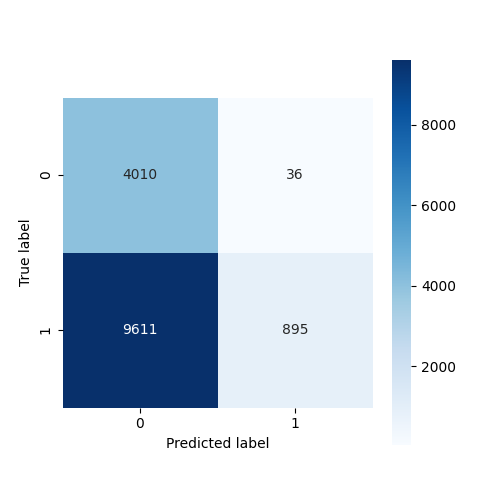

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(full_df_ptb[187], y_pred_cnn_ptb)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
# Add the last column and the predicted labels together
full_df_ptb_predict_test = pd.concat([full_df_ptb[187], pd.DataFrame(y_pred_cnn_ptb)], axis=1, ignore_index=True)


## Combine both datasets and train a model

In [32]:
full_df_mitbih

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109441,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109442,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109443,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109444,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [33]:
full_df_mitbih[187]=full_df_mitbih[187].astype(int)
equilibre_full=full_df_mitbih[187].value_counts(sort=False)
print(equilibre_full)

0    90589
1     2779
2     7236
3      803
4     8039
Name: 187, dtype: int64


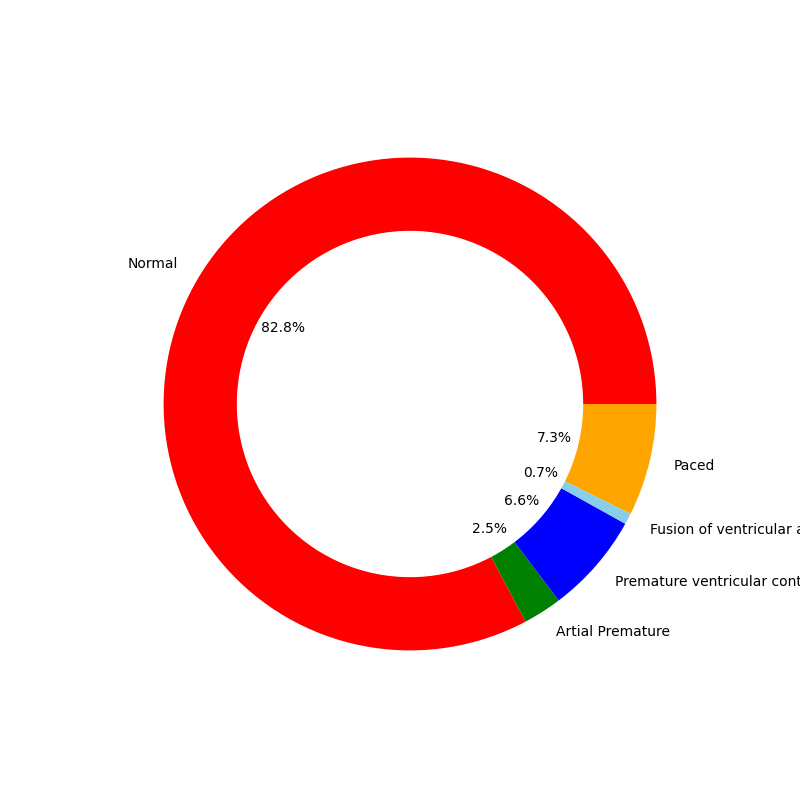

In [34]:
plt.figure(figsize=(8,8))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre_full, labels= labels
        , colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [35]:
# apply function to col1
full_df_mitbih[187] = full_df_mitbih[187].apply(lambda x: 1 if x >= 1 else x)

After converting the dataset from 5 classes to 2 (normal/abnormal)

In [36]:
full_df_mitbih[187]=full_df_mitbih[187].astype(int)
equilibre_full=full_df_mitbih[187].value_counts(sort=False)
print(equilibre_full)

0    90589
1    18857
Name: 187, dtype: int64


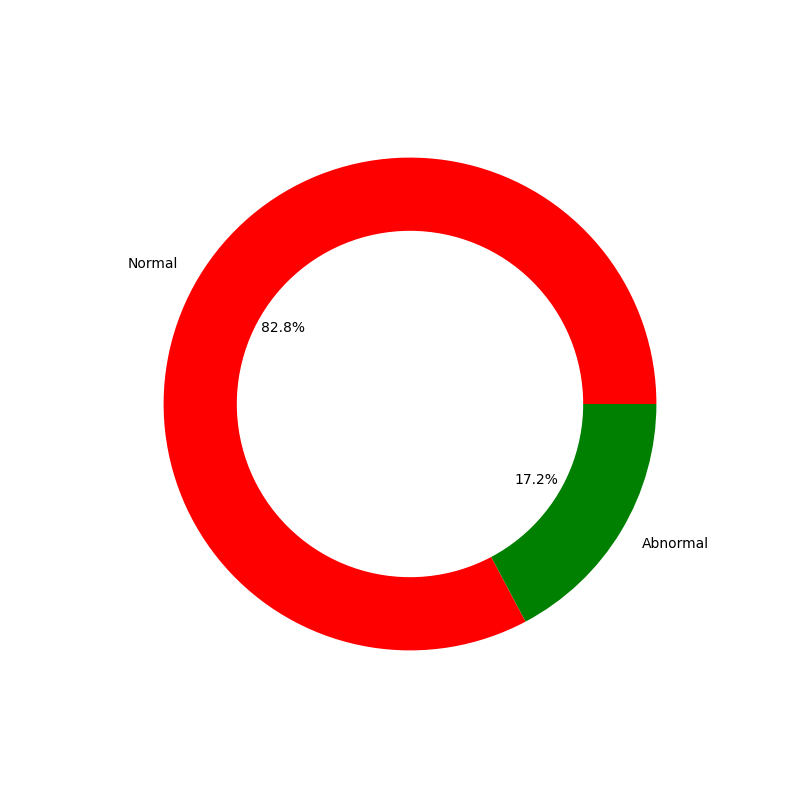

In [37]:
plt.figure(figsize=(8,8))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre_full, labels= ['Normal','Abnormal']
        , colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [38]:
full_df_ptb

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14548,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14549,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14550,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
# Add the two datasets together
full_df = pd.concat([full_df_mitbih, full_df_ptb], axis=0, ignore_index=True)
full_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123993,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
123994,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
123995,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
123996,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
full_train_df, full_test_df = train_test_split(full_df, test_size=0.2, random_state=42, stratify=full_df[187])

full_train_X = full_train_df.iloc[:, :-1]
full_train_y = full_train_df.iloc[:, -1]

full_train_X, full_valid_X, full_train_y, full_valid_y = train_test_split(full_train_X, full_train_y, test_size=0.2, random_state=42, stratify=full_train_y)

full_test_X = full_test_df.iloc[:, :-1]
full_test_y = full_test_df.iloc[:, -1]


## Training some ML Models

### SVM

In [45]:
from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split


# Train SVM classifier
svm = SVC(kernel='poly', C=1)
svm.fit(full_train_X, full_train_y)

# Evaluate SVM classifier
accuracy = svm.score(full_test_X, full_test_y)
print(f'SVM classifier accuracy: {accuracy:.5f}')

SVM classifier accuracy: 0.91750


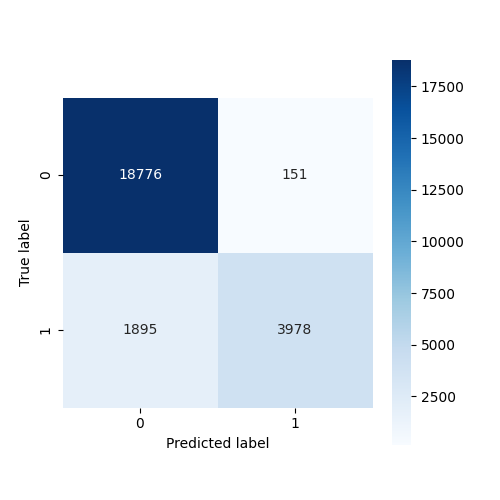

In [46]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Predict test set labels
y_pred_svm = svm.predict(full_test_X)

# Calculate confusion matrix
cm = confusion_matrix(full_test_y, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [47]:
print(classification_report(full_test_y, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     18927
         1.0       0.96      0.68      0.80      5873

    accuracy                           0.92     24800
   macro avg       0.94      0.83      0.87     24800
weighted avg       0.92      0.92      0.91     24800



## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Train random forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rfc.fit(full_train_X, full_train_y)

# Evaluate random forest classifier
accuracy = rfc.score(full_test_X, full_test_y)
print(f'Random forest classifier accuracy: {accuracy:.5f}')

Random forest classifier accuracy: 0.95883


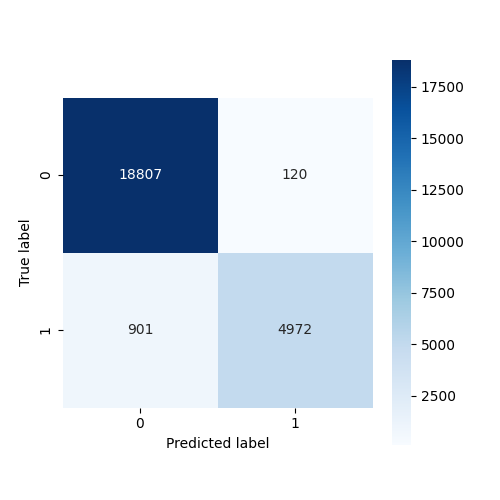

In [49]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Predict test set labels
y_pred_rfc = rfc.predict(full_test_X)

# Calculate confusion matrix
cm = confusion_matrix(full_test_y, y_pred_rfc)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [50]:
print(classification_report(full_test_y, y_pred_rfc))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     18927
         1.0       0.98      0.85      0.91      5873

    accuracy                           0.96     24800
   macro avg       0.97      0.92      0.94     24800
weighted avg       0.96      0.96      0.96     24800



## CNN

In [62]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

im_shape=(full_train_X.shape[1],1)
inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
conv1_1=BatchNormalization()(conv1_1)
pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
conv2_1=BatchNormalization()(conv2_1)
pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
conv3_1=BatchNormalization()(conv3_1)
pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
flatten=Flatten()(pool3)
dense_end1 = Dense(64, activation='relu')(flatten)
dense_end2 = Dense(32, activation='relu')(dense_end1)
main_output = Dense(1, activation='sigmoid', name='main_output')(dense_end2)


model = Model(inputs= inputs_cnn, outputs=main_output)
model.compile(optimizer='sgd', loss='binary_crossentropy',metrics = ['accuracy'])


callbacks = [EarlyStopping(monitor='val_loss', patience=8),
            ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

history=model.fit(full_train_X, full_train_y, epochs=40,callbacks=callbacks, batch_size=32,validation_data=(full_valid_X,full_valid_y))
model.load_weights('best_model.h5')



Epoch 1/40
 917/2480 [==========>...................] - ETA: 9s - loss: 0.3074 - accuracy: 0.8796

KeyboardInterrupt: 

In [42]:
scores = model.evaluate(full_test_X, full_test_y, verbose=0)
print("Accuracy: %.5f%%" % (scores[1]*100))


Accuracy: 98.27016%


775/775 [==============================] - 2s 2ms/step


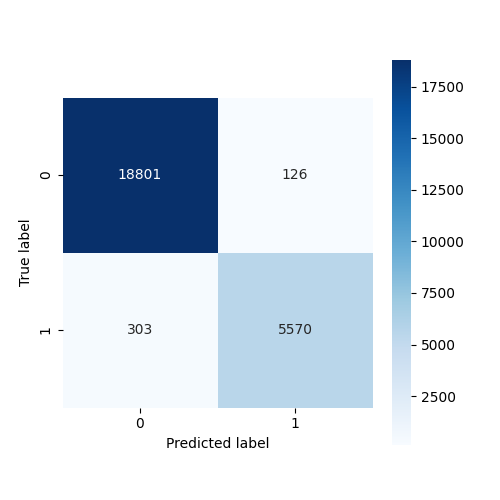

In [47]:
# Predict test set labels
y_pred = model.predict(full_test_X)
y_pred_cnn = np.where(y_pred > 0.5, 1, 0)

# Calculate confusion matrix
cm = confusion_matrix(full_test_y, y_pred_cnn)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [48]:
print(classification_report(full_test_y, y_pred_cnn))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     18927
         1.0       0.98      0.95      0.96      5873

    accuracy                           0.98     24800
   macro avg       0.98      0.97      0.98     24800
weighted avg       0.98      0.98      0.98     24800



In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()

# Convolutional layer 1
model.add(Conv1D(64, kernel_size=6, activation='relu', input_shape=(full_train_X.shape[1], 1)))
model.add(BatchNormalization())

# Pooling layer 1
model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))

# Convolutional layer 2
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())

# Pooling layer 2
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))

# Convolutional layer 3
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())

# Pooling layer 3
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))

# Flattening layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

history = model.fit(full_train_X, full_train_y, epochs=40, callbacks=callbacks, batch_size=32, validation_data=(full_valid_X, full_valid_y))
model.load_weights('best_model.h5')


In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
    Conv1D(64, kernel_size=6, activation='relu', input_shape=(full_train_X.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=3, strides=2, padding='same'),
    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2, strides=2, padding='same'),
    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2, strides=2, padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

history = model.fit(full_train_X, full_train_y, epochs=40, callbacks=callbacks, batch_size=32, validation_data=(full_valid_X, full_valid_y))
model.load_weights('best_model.h5')


In [63]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define a function to create the Keras model
def create_model(neurons=64, optimizer='sgd', activation='relu'):
    model = Sequential([
        Conv1D(neurons, kernel_size=6, activation=activation, input_shape=(full_train_X.shape[1], 1)),
        BatchNormalization(),
        MaxPooling1D(pool_size=3, strides=2, padding='same'),
        Conv1D(neurons, kernel_size=3, activation=activation),
        BatchNormalization(),
        MaxPooling1D(pool_size=2, strides=2, padding='same'),
        Conv1D(neurons, kernel_size=3, activation=activation),
        BatchNormalization(),
        MaxPooling1D(pool_size=2, strides=2, padding='same'),
        Flatten(),
        Dense(neurons, activation=activation),
        Dense(neurons//2, activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier with the create_model function
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameters to search over
param_grid = {
    'neurons': [32, 64, 128],
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'batch_size': [16, 32, 64],
    'epochs': [20, 40, 60]
}

# Use GridSearchCV to perform the hyperparameter search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_result = grid.fit(full_train_X, full_train_y)

# Print the best hyperparameters and accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
